In [69]:
import matplotlib.pyplot as plt
import numpy as np
import quandl
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime as dt
import pandas as pd
from matplotlib.dates import date2num
import seaborn as sns
%matplotlib inline

quandl.ApiConfig.api_key = '1x62xPokqcRhHMTZH3ok'




# Get Live Data from Quandl in a given period

In [70]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL','AMZN', 'FB' ,'NFLX', 'GOOGL', 'TSLA', 'BABA', 'NVDA', 'AXP', 'BBY', 'CMCSA', 'EA', 'INTC', 'JNPR', 'LLL'], 
                        qopts = { 'columns': ['ticker', 'date', 'high', 'low','open', 'close', 'volume'] }, 
                        date = { 'gte': '2016-05-01', 'lte': '2018-05-01' },
                        paginate = True)

data.columns = ['symbol', 'date', 'high', 'low','open', 'close', 'volume']

data.head(15)


#save to csv
data.to_csv("./file.csv", sep=',',index=False)

### Add A column to monitor the change of value of stock over time

In [71]:
from subprocess import check_output
mainFrame = data.copy()

# Set a new column to maintain daily change
mainFrame["change"] = mainFrame["close"] - mainFrame["open"]
df_interest = mainFrame.copy()
df_interest["date"] = pd.to_datetime(df_interest["date"])
df_interest.head(10)

,symbol,date,high,low,open,close,volume,change
None,,,,,,,,
0,AAPL,2016-05-02,94.08,92.40,93.965,93.64,48160104.0,-0.325
1,AAPL,2016-05-03,95.74,93.68,94.200,95.18,56831277.0,0.980
2,AAPL,2016-05-04,95.90,93.82,95.200,94.19,41025475.0,-1.010
3,AAPL,2016-05-05,94.07,92.68,94.000,93.24,35890500.0,-0.760
4,AAPL,2016-05-06,93.45,91.85,93.370,92.72,43699886.0,-0.650
5,AAPL,2016-05-09,93.77,92.59,93.000,92.79,32936436.0,-0.210
6,AAPL,2016-05-10,93.57,92.11,93.330,93.42,33686836.0,0.090
7,AAPL,2016-05-11,93.57,92.46,93.480,92.51,28719109.0,-0.970
8,AAPL,2016-05-12,92.78,89.47,92.720,90.34,76314690.0,-2.380


### Apply Pivot function to modify columns as dates and symbols as rows

In [72]:
symbolCloseWide = mainFrame.pivot(index='symbol', 
                                  columns='date', 
                                  values='close')
symbolCloseWide.head()

date,2016-05-02 00:00:00,2016-05-03 00:00:00,2016-05-04 00:00:00,2016-05-05 00:00:00,2016-05-06 00:00:00,2016-05-09 00:00:00,2016-05-10 00:00:00,2016-05-11 00:00:00,2016-05-12 00:00:00,2016-05-13 00:00:00,...,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,93.64,95.18,94.19,93.24,92.72,92.79,93.42,92.51,90.34,90.52,...,178.44,178.65,178.02,175.30,175.24,171.27,168.845,164.94,172.77,168.34
AMZN,683.85,671.32,670.90,659.09,673.95,679.75,703.07,713.23,717.93,709.92,...,1591.00,1582.32,1571.68,1544.93,1586.51,1581.86,1544.100,1495.56,1555.86,1497.05
AXP,65.68,64.85,64.26,63.92,64.51,63.98,64.84,64.59,64.34,64.12,...,94.53,94.39,95.61,94.84,94.95,94.74,91.410,90.45,92.62,91.42
BBY,32.27,31.74,31.50,31.61,31.98,32.66,32.97,31.53,31.25,30.95,...,69.90,68.99,69.73,68.53,70.04,68.44,67.250,66.68,69.51,67.74
CMCSA,61.23,60.95,60.89,61.05,61.42,61.42,62.64,62.07,62.26,61.84,...,36.02,36.15,35.83,35.30,34.57,34.49,33.230,33.17,33.54,32.99


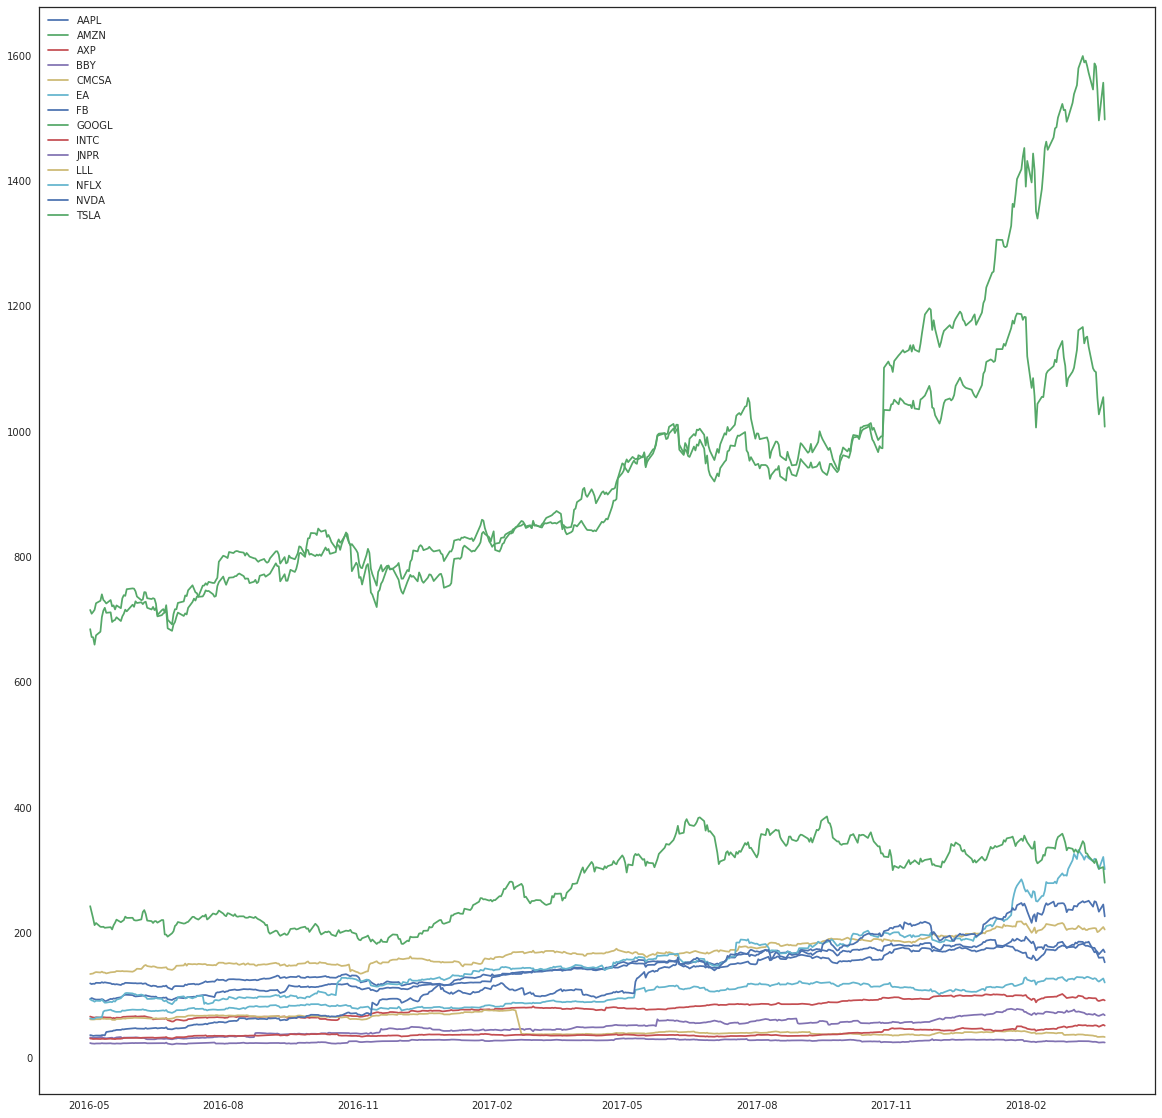

In [74]:
symbols = df_interest["symbol"].unique().tolist()
fig, ax = plt.subplots(figsize=(20,20))
for u in symbols[:14]:
    dates = df_interest[(df_interest["symbol"] == u)]["date"]
    values = df_interest[(df_interest["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
plt.legend(symbols, loc='upper left')
plt.show()


#### We can see how each stock is performing over the past 2 years. Obviously, Amazon and Google stocks are much more expensive than the rest. The others vary within 10 and 500$/shares whereas AMAZON and GOOGLE are more expensive.

In [77]:
#latest_year = max(pd.unique(list(df_interest["date"].apply(lambda x:x.year))))
#latest_year_mask = [i==latest_year for i in df_interest["date"].apply(lambda x:x.year)]
#df_masked1 = df_interest[latest_year_mask]
#df_masked1.head()

In [78]:
symbols = df_interest["symbol"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_interest[(df_interest["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(), 
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:5]).keys())

top_10_mask = [i in top10Closers for i in df_masked1["symbol"].tolist()]
df_masked2 = df_masked1[top_10_mask]
df_masked2.head()

,symbol,date,high,low,open,close,volume,change
None,,,,,,,,
897,AMZN,2018-01-02,1190.00,1170.51,1172.00,1189.01,2587899.0,17.01
898,AMZN,2018-01-03,1205.49,1188.30,1188.30,1204.20,3044664.0,15.90
899,AMZN,2018-01-04,1215.87,1204.66,1205.00,1209.59,3000366.0,4.59
900,AMZN,2018-01-05,1229.14,1210.00,1217.51,1229.14,3430148.0,11.63
901,AMZN,2018-01-08,1253.08,1232.03,1236.00,1246.87,4177533.0,10.87


# WHich stocks are the top 5 between the list of stocks I picked in 2018 based on closing prices?

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



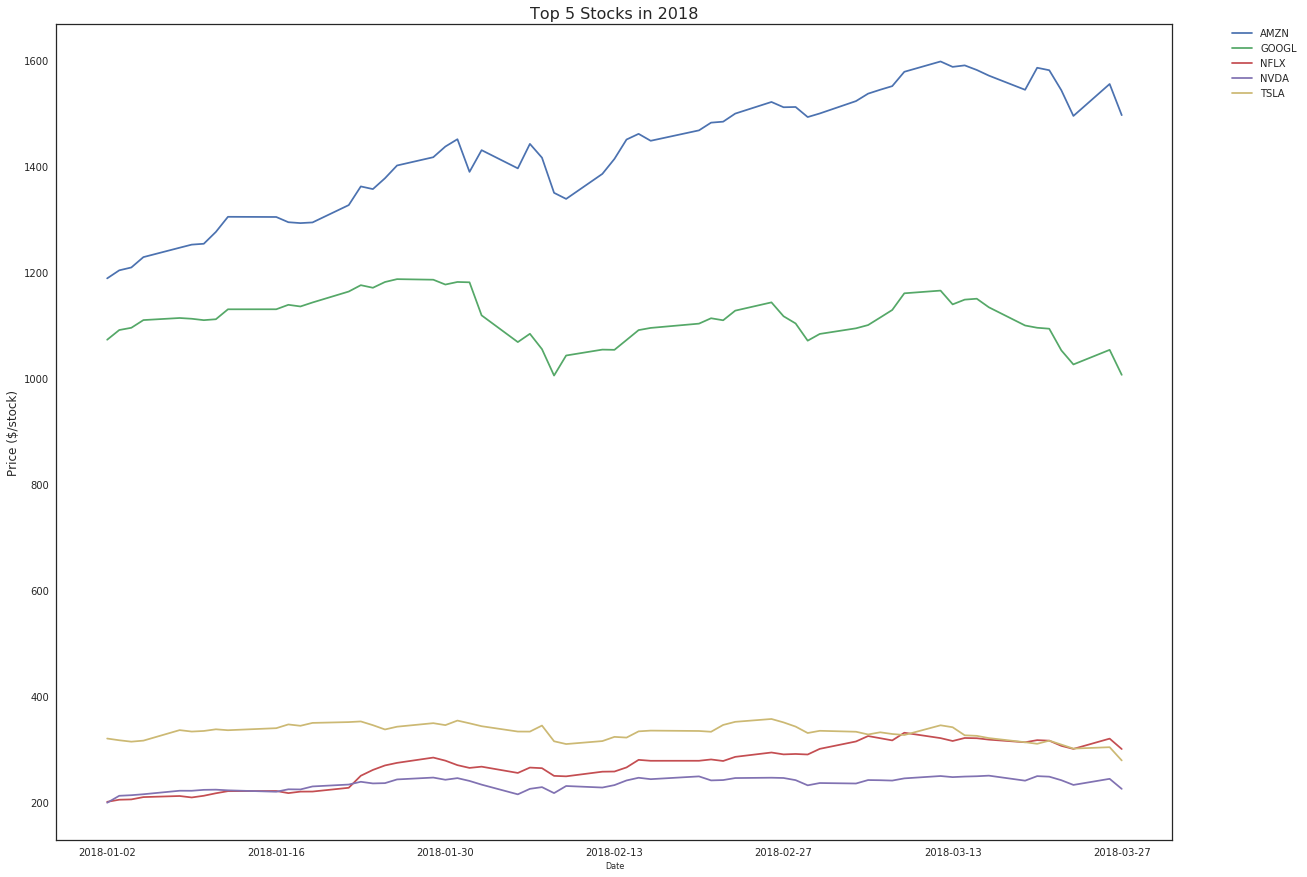

In [83]:
symbols = df_masked2["symbol"].unique().tolist()
fig, ax = plt.subplots(figsize=(20,15))
for u in symbols[:14]:
    dates = df_masked2[(df_interest["symbol"] == u)]["date"]
    values = df_masked2[(df_interest["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Top 5 Stocks in 2018', fontsize=16)

plt.xlabel('Date', fontsize=8)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

# Which stocks have the best close change spread using the density

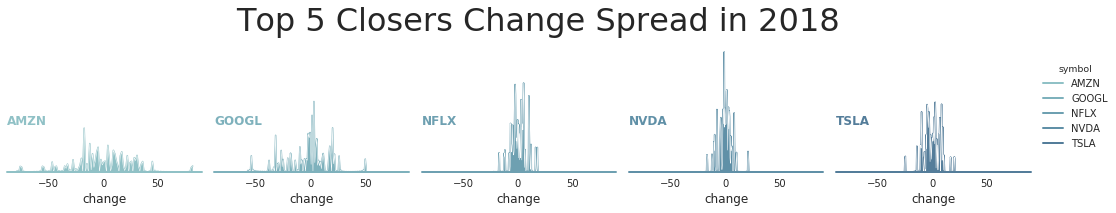

In [84]:
def build_density_facetwrap(somedf, colName, valName, wrapAmount, yourTitle):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(somedf,col=colName, hue=colName, col_wrap=wrapAmount, palette=pal)
    # Draw the densities in a few steps
    g.map(sns.kdeplot, valName, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, valName, clip_on=False, color="w", lw=0.5, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .4, label, fontweight="bold", color=color, 
                ha="left", va="center", transform=ax.transAxes)
        plt.xlabel('Change ($/day)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    g.map(label, "change")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=0)

    # Remove axes details that don't play will with overlap


    g.set_titles("")
    g.fig.suptitle(yourTitle, fontsize=32)
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(top=.8)
    g.add_legend()

build_density_facetwrap(df_masked2,
                       "symbol",
                        "change",
                        5,
                        "Top 5 Closers Change Spread in 2018"
                       )

#### We can see that the best closers change spread are the ones plotted. We see that Amazon is the most stable since the negative change is limited even in a bearish market. On the other hand, Netflix has been doing pretty well in its industry due to the millions of subscribers being added. TSLA has been very volatile in 2018 but nevertheless is considered to be one of the top in 2018 to invest in.

In [90]:
#from __future__ import division

# Get each symbols standard deviation in time
#ss = df_interest.groupby(by=["symbol"])["change"].std()

# Count each symbol groups positive day change in time
## NOTE: it is a proportion to account for some days not appearing for some symbols in time
#pcs = df_interest.groupby(by='symbol').apply(lambda grp: grp[grp['change'] > 0]['change'].count() / grp['change'].size)

#avgv = df_interest.groupby(by=['symbol'])['volume'].mean()/10000000

#newdf = pd.concat([ss, pcs, avgv], axis=1).reset_index()
#newdf.columns = ['symbol', 'std', 'prop_pos_day_change', "avg_volume"]
#newdf.head()

In [85]:
#for i in newdf['symbol'].tolist():
#    x = newdf[newdf['symbol'] == i]['std']
#    y = newdf[newdf['symbol'] == i]['prop_pos_day_change']
#    plt.scatter(x,y)
#plt.legend(newdf['symbol'].tolist(),
#           bbox_to_anchor=(1.05, 1),
#           loc=2,
#           borderaxespad=0.,
#          ncol=1)


#plt.title('Stock Change and Spread', fontsize=22)
#plt.xlabel('Daily Positive Change (%)', fontsize=14)
#plt.ylabel('Total Standard Devation', fontsize=14)
#plt.figure(figsize=(10,100))
#plt.show()

In [44]:
data2 = data.copy()
data2 = data2.assign(Returns=data.close.pct_change())

data2.head()

,symbol,date,high,low,open,close,volume,Returns
None,,,,,,,,
0,AAPL,2016-05-02,94.08,92.40,93.965,93.64,48160104.0,NaN
1,AAPL,2016-05-03,95.74,93.68,94.200,95.18,56831277.0,0.016446
2,AAPL,2016-05-04,95.90,93.82,95.200,94.19,41025475.0,-0.010401
3,AAPL,2016-05-05,94.07,92.68,94.000,93.24,35890500.0,-0.010086
4,AAPL,2016-05-06,93.45,91.85,93.370,92.72,43699886.0,-0.005577


In [86]:
APPL = data2[data2['symbol'] == "AAPL"]
APPL.head()

,symbol,date,high,low,open,close,volume,Returns
None,,,,,,,,
0,AAPL,2016-05-02,94.08,92.40,93.965,93.64,48160104.0,NaN
1,AAPL,2016-05-03,95.74,93.68,94.200,95.18,56831277.0,0.016446
2,AAPL,2016-05-04,95.90,93.82,95.200,94.19,41025475.0,-0.010401
3,AAPL,2016-05-05,94.07,92.68,94.000,93.24,35890500.0,-0.010086
4,AAPL,2016-05-06,93.45,91.85,93.370,92.72,43699886.0,-0.005577


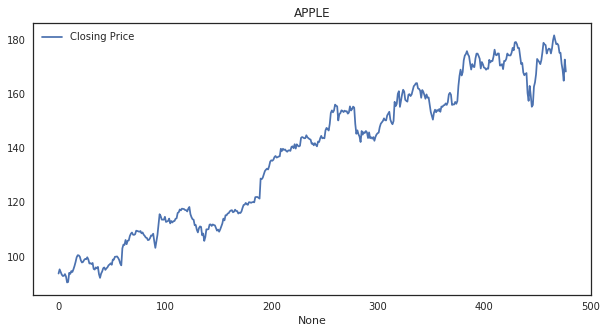

In [87]:
APPL['close'].plot(legend=True, figsize=(10, 5), \
title='APPLE', \
label='Closing Price')


# Volume VS Price (we see a big relation between volume spikes and sharp increase or decrease in price)

Text(0,0.5,'Volume')

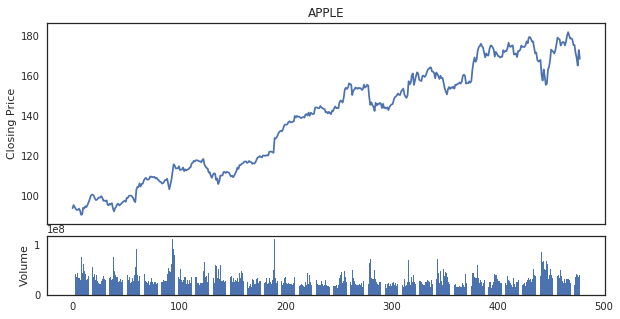

In [88]:
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(APPL.index, APPL['close']) #CMT.index gives the dates
bottom.bar(APPL.index, APPL['volume']) 

# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('APPLE')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

# Distribution of the stock

/home/bda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



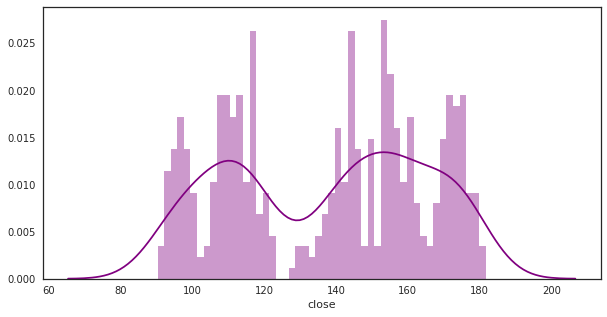

In [89]:
plt.figure(figsize=(10,5))
sns.distplot(APPL['close'].dropna(), bins=50, color='purple')

# Plotting moving averages over 20 and 50 days

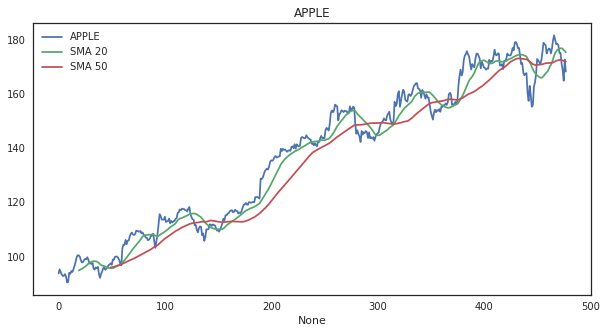

In [59]:
# simple moving averages
sma20 = APPL['close'].rolling(20).mean() #20 days
sma50 = APPL['close'].rolling(50).mean() #50 days

APPLsma = pd.DataFrame({'APPLE': APPL['close'], 'SMA 20': sma20, 'SMA 50': sma50})
APPLsma.plot(figsize=(10, 5), legend=True, title='APPLE')


# Plotting daily return of apple over time 

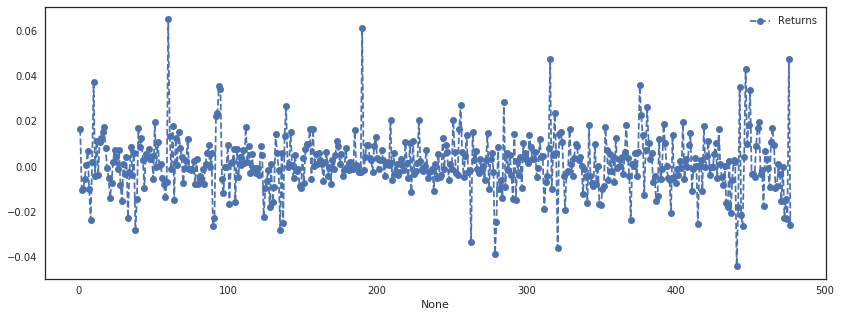

In [60]:
#Plotting the daily return

APPL['Returns'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

/home/bda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



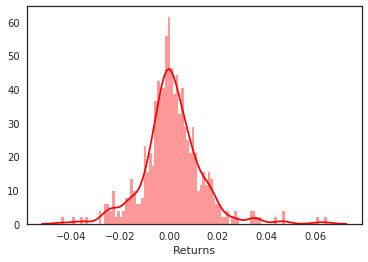

In [62]:
sns.distplot(APPL['Returns'].dropna(),bins=100,color='red')

# Heatmap showing the correlation between the closing prices among the stocks

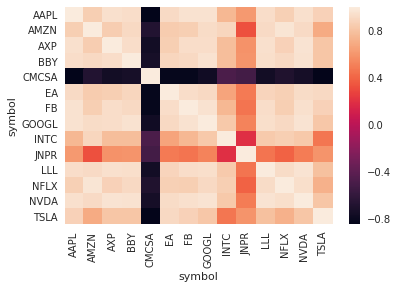

In [32]:
Pvt = data.pivot_table(index="date", columns="symbol", values = "close")
Pvt

ax = Pvt.corr()
sns.heatmap(ax)

In [30]:
from sklearn.cluster import KMeans

# Visualize K = {3..9}
kValues = [i for i in range(3,9)]
for k in kValues:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(newdf[['std','prop_pos_day_change']].as_matrix())
    newdf[str(k)] = kmeans.labels_
    print("Finished k=", k)

newdf = pd.melt(newdf, 
                id_vars=["symbol", 'std', 'prop_pos_day_change'],
                var_name="k", 
                value_name="values",
                value_vars=list(newdf.columns[-6:]))
12.
newdf.head(10)

Finished k= 3
Finished k= 4
Finished k= 5
Finished k= 6
Finished k= 7
Finished k= 8


/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



,symbol,std,prop_pos_day_change,k,values
0,AAPL,1.404064,0.539749,3,2
1,AMZN,12.970663,0.497908,3,1
2,AXP,0.796488,0.511482,3,2
3,BBY,0.833586,0.546973,3,2
4,CMCSA,0.546169,0.491632,3,2
5,EA,1.356903,0.526096,3,2
6,FB,1.717297,0.505219,3,2
7,GOOGL,9.426797,0.521921,3,1
8,INTC,0.446917,0.546025,3,2
9,JNPR,0.320050,0.517745,3,2


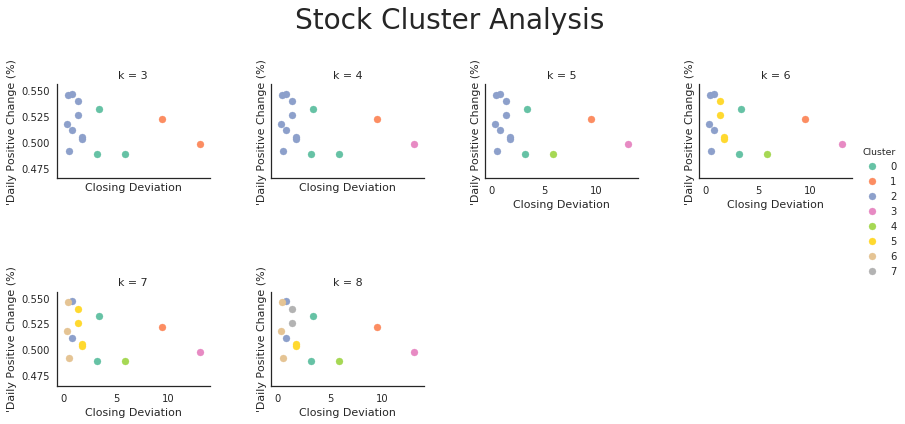

In [31]:
g = sns.FacetGrid(newdf, col="k", hue="values", col_wrap=4, palette='Set2')
g = g.map(plt.scatter, "std", "prop_pos_day_change")
g.set(xlabel="Closing Deviation")
g.set(ylabel="'Daily Positive Change (%)")
g.fig.suptitle("Stock Cluster Analysis", size=28)
g.fig.subplots_adjust(top=.8)
plt.subplots_adjust(hspace=1.2, wspace=0.4)
g.add_legend()
g._legend.set_title("Cluster")